# Employee Attrition - Training the model

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

employee_data = pd.read_csv("data/prepared-employee_attrition.csv",index_col=0)
#employee_data.set_index(employee_data.iloc[0], inplace=True)
employee_data.dtypes

Age                                    int64
Attrition                               bool
BusinessTravel                       float64
DailyRate                              int64
DistanceFromHome                       int64
Education                              int64
EmployeeCount                          int64
EmployeeNumber                         int64
EnvironmentSatisfaction                int64
Gender                                 int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                          int64
MonthlyRate                            int64
NumCompaniesWorked                     int64
Over18                                  bool
OverTime                                bool
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StandardHo

# Splitting The Data

array([<AxesSubplot: ylabel='0'>], dtype=object)

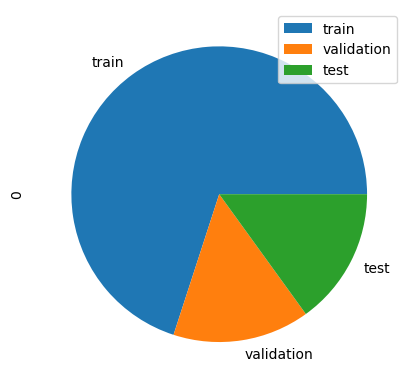

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

my_test_and_val_size = 0.3

X = employee_data.loc[:, employee_data.columns != 'Attrition']
y = employee_data['Attrition']
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=my_test_and_val_size)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, test_size=0.5)

pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train', 'validation', 'test']).plot(kind='pie', subplots=True)
    
    
    

After that we want a equal distribution of our labels (stratify)

In [57]:
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=my_test_and_val_size, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, test_size=0.5, stratify=y_test_full)

<AxesSubplot: title={'center': 'test'}, ylabel='Attrition'>

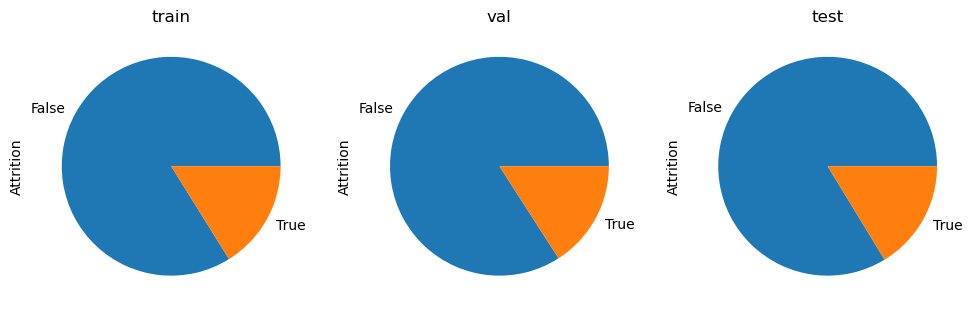

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

# Training The Model

## Baseline

In [59]:
from sklearn.dummy import DummyClassifier

In [60]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 83.71%


## Decision Tree

In [61]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 78.64%


### Nice we are performing worse :) igkms 

In [62]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    for curr_max_depth in range(1, 15):
        dt_model = DecisionTreeClassifier(max_depth=curr_max_depth)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)
        
        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth
        if do_print:
            print('max depth {}: {:.2%} accuracy on validation set.'.format(curr_max_depth, accuracy_score))
    if do_print:
        print('-' * 20)
    print('best max depth {} has {:.2%} accuracy.'.format(result, accuracy_max))
    return result

In [63]:
 best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)

max depth 1: 84.09% accuracy on validation set.
max depth 2: 85.91% accuracy on validation set.
max depth 3: 85.00% accuracy on validation set.
max depth 4: 85.00% accuracy on validation set.
max depth 5: 83.64% accuracy on validation set.
max depth 6: 83.64% accuracy on validation set.
max depth 7: 82.27% accuracy on validation set.
max depth 8: 81.36% accuracy on validation set.
max depth 9: 82.73% accuracy on validation set.
max depth 10: 81.36% accuracy on validation set.
max depth 11: 80.00% accuracy on validation set.
max depth 12: 79.09% accuracy on validation set.
max depth 13: 79.09% accuracy on validation set.
max depth 14: 78.18% accuracy on validation set.
--------------------
best max depth 2 has 85.91% accuracy.


### Finally performing better than random

In [64]:
dt_model = DecisionTreeClassifier(max_depth=best_max_depth)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(test_y, pred_y)))
print('Recall: {:.2%}'.format(metrics.recall_score(test_y, pred_y)))
print('Precision: {:.2%}'.format(metrics.precision_score(test_y, pred_y)))
print('F1 Score: {:.2%}'.format(metrics.f1_score(test_y, pred_y)))


Accuracy: 83.42%
Recall: 10.00%
Precision: 46.15%
F1 Score: 16.44%


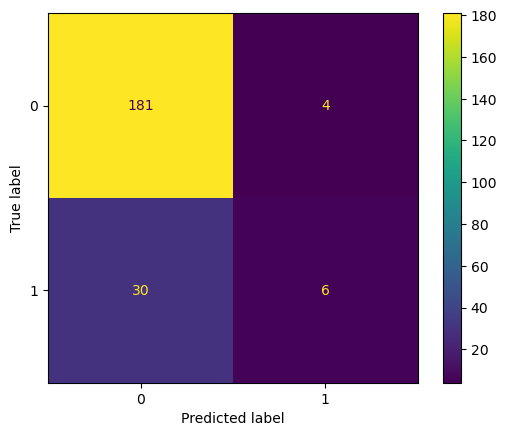

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [66]:
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('F1 Score: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))


Accuracy: 84.62%
Recall: 16.67%
Precision: 60.00%
F1 Score: 26.09%


# Cross Validation 

In [67]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=5)
scores.mean()


0.8448979591836736

In [68]:
scores = cross_val_score(dt_model, X, y, scoring='recall', cv=5)
scores.mean()

0.2075354609929078

In [69]:
scores = cross_val_score(dt_model, X, y, scoring='f1', cv=5)
scores.mean()

0.27973359090996575

In [70]:
from sklearn.ensemble import RandomForestClassifier

X = employee_data.loc[:, employee_data.columns != 'Attrition']
y = employee_data['Attrition']

train_X, test_X, train_y, test_y = train_test_split(X, y)
rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)
pred_y = rf_model.predict(test_X)
accuracy_score = metrics.accuracy_score(pred_y, test_y)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(test_y, pred_y)))
print('Recall: {:.2%}'.format(metrics.recall_score(test_y, pred_y)))
print('Precision: {:.2%}'.format(metrics.precision_score(test_y, pred_y)))
print('F1 Score: {:.2%}'.format(metrics.f1_score(test_y, pred_y)))

Accuracy: 84.78%
Recall: 12.70%
Precision: 88.89%
F1 Score: 22.22%


In [71]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy=1)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_under, y_under)
y_pred = rf_model.predict(X_test)
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 77.38%
Recall: 66.67%
Precision: 38.71%
F1: 48.98%


In [72]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversampler.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_over, y_over)
y_pred = rf_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 86.43%
Precision: 75.00%
Recall: 25.00%
F1: 37.50%


In [91]:
len(X.columns)

51

In [97]:
X.loc[:, X.columns!=]

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,2.0,1102,1,2,1,1,2,0,94,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,1.0,279,8,1,1,2,3,1,61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,2.0,1373,2,2,1,4,4,1,92,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1.0,1392,3,4,1,5,4,0,56,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,2.0,591,2,1,1,7,1,1,40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,32,1.0,1005,2,2,1,8,4,1,79,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,59,2.0,1324,3,3,1,10,3,0,81,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,30,2.0,1358,24,1,1,11,4,1,67,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,38,1.0,216,23,3,1,12,4,1,44,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,36,2.0,1299,27,3,1,13,3,1,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler

smote = SMOTENC(sampling_strategy=0.4,
                categorical_features=employee_data.columns.get_indexer(employee_data.loc[:, employee_data.columns != 'Attrition'].columns))
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.index = X_train.index
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.index = X_test.index
X_test_scaled.columns = X_test.columns

X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

undersampler = RandomUnderSampler(sampling_strategy=1)
X_smote, y_smote = undersampler.fit_resample(X_smote, y_smote)
y_smote.value_counts()

rf_model = RandomForestClassifier()
rf_model.fit(X_smote, y_smote)
y_pred = rf_model.predict(X_test_scaled)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

ValueError: Some of the categorical indices are out of range. Indices should be between 0 and 50

<AxesSubplot: >

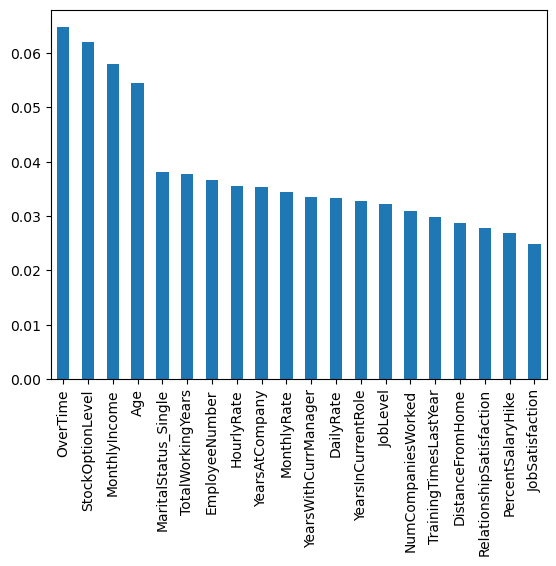

In [81]:
feature_importances = pd.Series(rf_model.feature_importances_, index=employee_data.loc[:, employee_data.columns != 'Attrition'].columns[:])
feature_importances.sort_values(ascending=False)
feature_importances.nlargest(20).plot(kind='bar')